In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pendulum
import random

## Value iteration 

#### State space:
$\theta \in [0, 2\pi]$ in 50 states and $\dot{\theta} \in [-6, 6]$ is 50 states

In [2]:
# we can create a robot
robot = pendulum.Pendulum()

# List out discretized state space
discretized_theta = np.linspace(0, 2*np.pi, 50, endpoint=False)
discretized_thetadot = np.linspace(-6, 6, 50)

# Function to find index of a specific state
def index_state(state):
    index_theta = np.argmin(np.abs(discretized_theta - state[0]))
    index_thetadot = np.argmin(np.abs(discretized_thetadot - state[1]))
    return index_theta, index_thetadot

#### Defining cost function and sparse cost function:

In [3]:
# cost
def cost(theta,theta_dot,u):
    cost = (theta - np.pi)**2 + 0.01 * (theta_dot**2) + 0.0001 * (u**2)
    return cost

def cost_sparse(theta,theta_dot,u):
    if abs(theta - np.pi) < 0.2:
        cost = 0
    else:
        cost = 1     
    return cost

In [4]:
def value_iteration(robot):

    value_function = np.zeros([50,50])
    policy = np.zeros([50,50])
    
    iterations = 1
    out = False
    while (not out):
        new_vf = np.ones(value_function.shape)*np.inf
        for i in range(len(discretized_theta)):
            for j in range(len(discretized_thetadot)):
                for u in controls:
                    x = np.array([discretized_theta[i], discretized_thetadot[j]])
                    x_next = robot.next_state(x, u)
                    index_theta, index_thetadot = index_state(x_next)
                    value = cost_function(x[0],x[1],u) + alpha * value_function[index_theta, index_thetadot]
                    if value < new_vf[i,j]:
                        new_vf[i,j] = value
                        policy[i,j] = u 
                        
# Can be used to estimate run time       
#         if iterations%20 == 0:
#             print(iterations)
        
        iterations += 1
        
# Loop for checking convergence
        out = True
        for i in range(len(discretized_theta)):
            for j in range(len(discretized_thetadot)):
                if abs(value_function[i,j] - new_vf[i,j]) > 10**-2:
                    out = False
#         if (abs(value_function-new_vf)<10**(-6)).all:
#             break
        value_function = new_vf.copy() 
        
    print("The number of iterations required for convergence : ",iterations)
    
    return new_vf, policy 

In [5]:
controls = np.array([-5,0,5])
alpha = 0.99
cost_function = cost
v,p = value_iteration(robot)

The number of iterations required for convergence :  326


<IPython.core.display.Javascript object>


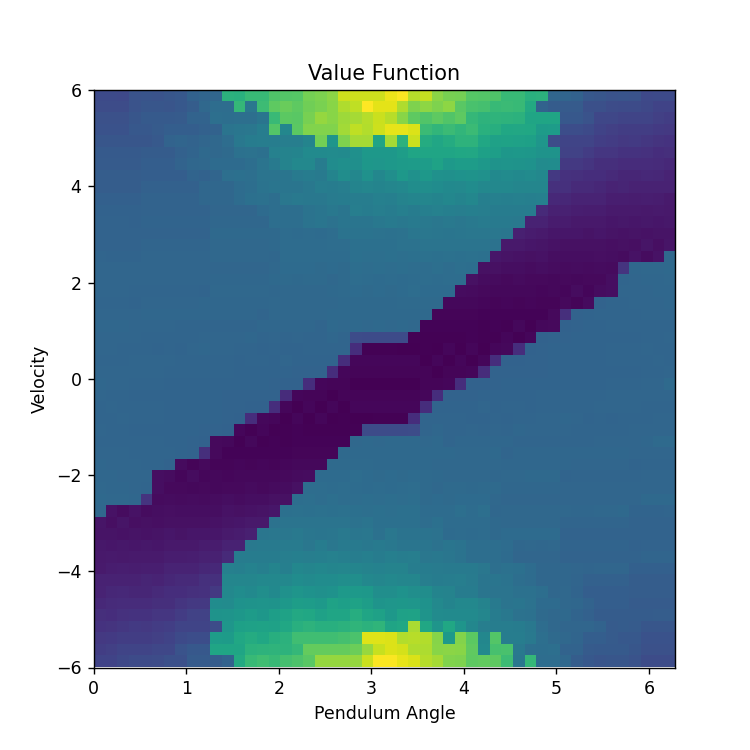

<IPython.core.display.Javascript object>


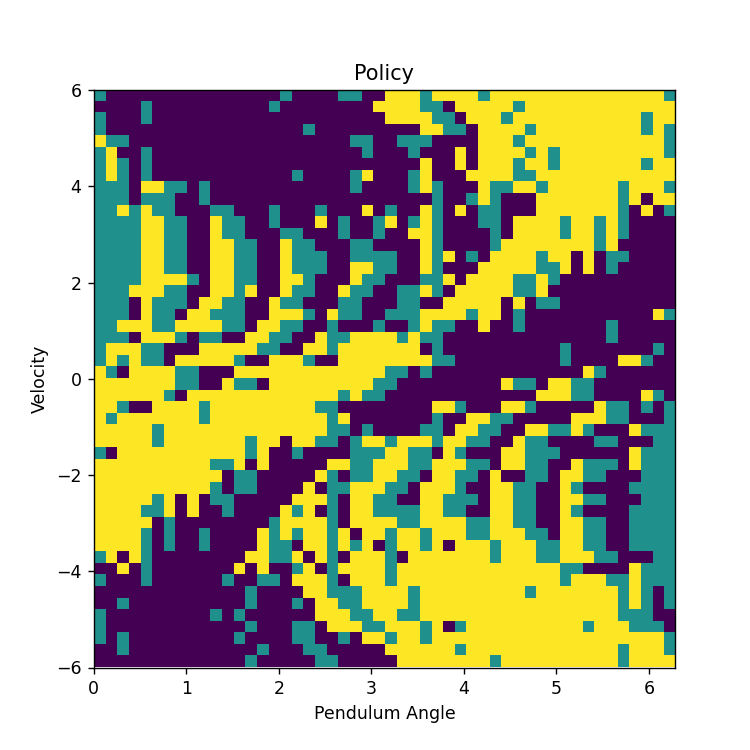

<IPython.core.display.Javascript object>


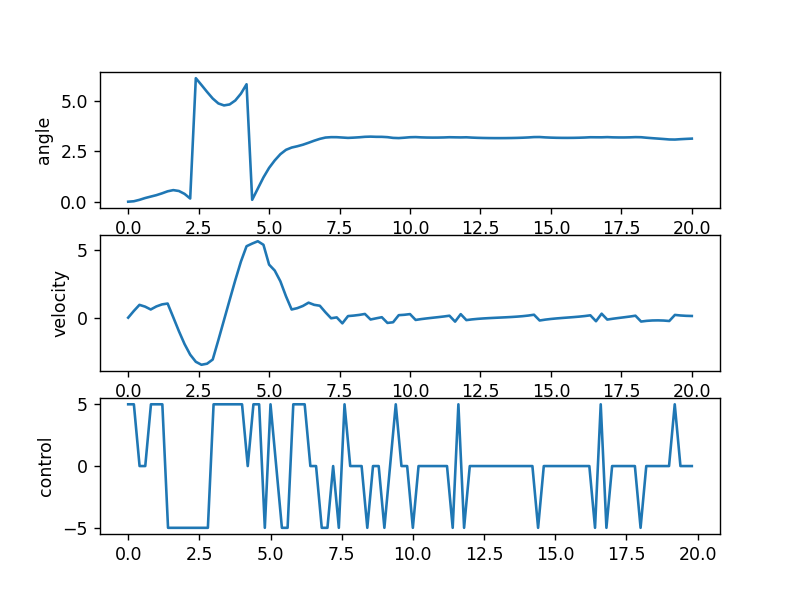

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAfSZtZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhy
ZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA0vZYiEABD//veBvzLL
XyK6yXH5530srM885DxyXYmuuNAAAAMAAAMAAUeHteuN3YNbSdAAABrAA6Qix/9vpDjcAE/ZYPzW
Iy/xaAfWoiuIxPmK2D7zN1SWOL4zZ8ixj9mJWyafzaQPJPgumMKQ5V59n8tUzfUDS0tnaGINepwN
ygSCAo62Nj0Ixhv5SVoJFUYpmvY7OlceVopm0K7e9iLYzS+7C8RJRANe5oQnlmwO88l0TgfHNasA
cBupheGfaeEXLZmHWO+X2fTyHC+vtQ7TaNefQ7CHnR1luQXnqFHjCK9efiyP+qu6t8Lv5Q2TfbSJ
Uzs0SeYcbqwmukz92HSdD7mvf05DpwdQWbSEHWRNjTXhumQVil9qnvK4qtsUvcIMXzoSTSbemIa1
zJu841W2+V44G5B3MZ0BrlgHnYsCWKot35uLoxydIpjYWg9+7lBp1dLoRR8HR6ljB55JGWL+XQwN
sLum9zkPSkcJ+V/Ngl3Qa8E35Nz34JkIu35PUQAXNmP5a/sJO/zRhyFusW1qwkI1iN5DIJp2XQqA
bPb8kSwU6QlSI+2r/Ap+Q0l5RJ/0nftzawE1OQzWCRSL/fGQO94rq9bladJxrF8QRZSdR9vuHOb9
LHOidxh0CfkFn1zDDKZ6xn6mDvAAWWi6LbBQfyx5GxcLoqexfshUiZjj4579qehLAs2eJLYzPFtX
V2hBtrLktP6rM42xUGNNvgCK9lWqUHPtQRVqq3Nabte6IX088F59nygAudtZ5wAAAwEsMFHKmmOQ
JL6c6omG4FzLrFROVCN8Y3SWZfWBnhVC5ZxYKdUzuUti4r9eKJYkh5hIAX8r4CVBmPr4lxft7JTF
FDb4zeNw275cj37UJqLU8BJzS+KpO0D1md0phCkCGUmoZrKZNWoKXeMHxXKRUEPYLG7cMHsUeBrE
fvwjf6TIBPmo5X/Js9NUip6JQW3E4NQcYAyThbEq5Rarf85oOVb19ZXzh2rYaL6Mu3Xf72FKoy75
b2DUFhW11asL0gdfOw9cd6//LzUoKwb7fnrhp68i+oPIjy1vZVRxAkp560e6GK1nPaei8uCjS+2c
hzafSxn5kGbz1v/XuktqJrMVcT5kTQKbgxnsxlORaEH/U9XGC01STeixv2Nkjq6cJftx8Rothac1
XXKwOqyGx5ogmId0sZ+ZCJRZL+9/EI8tXmvrhiqyssB5Jz2foSX8oWU8sthZLUL2GSa9etyWRPBt
cblR6+jz9jz6cKmtlP9mrsiqS5A2gPUpsSIDWmHYSjiZJ1k1l3WDsK2F1UOvRbTXeW4HMId13ROZ
hIUhMMBEsz/aYKw4h//ftO5/mJjLY1dd/kNI8uUvFfQKYprAv7Jfub4WCcQbJJayH0jSybNlPCEl
MHt2xmySsE+B5nJW5OSUcABHt0vCVQ2S+sHXBbyFF9scNX3tk6MebHAuBgCE48wR91F3UCuzDfk3
1n4pEe9AFHuQIeO20Jb8OAOL/C8dqAG5xSHWfpFTng9dbrzSHaB19P+7i9K2Yt6xLEfRNB7sA1vD
jUIUtCkaILwtFdWHYec87tlPCLTvEbwLA7y6EQILp4koGICBozeubkjOG5EtuQHQGlgoGrREg7S3
dh7V0YUtiq1lG/TBCyzsQnEYoJB8dcO4kZPT5f6Gw0ZZDEDqv11ap873OZubboOFnBNXJE5CmbG2
m+ag51qTWHAt3WjoOuHtT2P43V17nQnDR4x4aq5hpwGeb71STKsaGfWfhzPmTwFGGwjUgMhEcGOO
OAUGSysosNvtMajWCRqH3DZLZMujgE2Z/cXB/r/V5BQuQQlRbFEZQKKSZosd1IZL0oVI5WUI4D6F
sal5WxLZhfK6Wt2GsAatlB1WSbYiOI0QtJoIY3MJusOoy/+Ke62ze1jJDqD7RhkRogf14unDXJfx
D4Yto1zIh3JELLMRQeKrVOhZ3fOTl27tSLxNy19OR1GiQQbTAybt5oXyJzbzA+cP6E4M8woOpDNd
05W8FxsAi9bjhTDTsj7C/CZK/ug+VTiC2OaEgvNsDTdUWCgfC6xE0PlwgLAxzVSouVikH0aZWE/d
/V9BhKsNn0EWtaR1yltudiT0glU80hfcfLfFI/yfulaY84oKNv9O5L9FVLAu/xV8pQowwj9znR/4
Gnes11mmqhfCB/cUu7UwZtokkp1QAuBjccBaEHjBYDvXJXUNvuWV5OwWuO+5/YZjWAFaIs0adh+a
brz1QDEQHSyt9f5aSjEP5scP/yoMSkQYKlDsRgc/PVtHhV2mz7EMClm/m7fjCoh/d45NVrYWOcfZ
JKEycRhV/4iLkGBZM4So4VwBeXEusTnQlB0WpAvABcJG8uuBx/1nEp3lIAV9NSC3Ng0FONoYzE7p
F3DTs3Fjmv3h0gCxRSPUw4bA7pn4kFCtQyB7FdqOif5fyOv6nDwAAB3nbhBqPcDEtfQ90gMOhFpb
aOtAGCzlvAAAAwAAFPIHZohWA3/+lciAaBELy96lf9ylyzs4WjPBfSpQ8ktLfF3CO+6nnPAMWkCN
WlQgwnLCAuDZw9Ri+nwq/ZMfdclSoj7dr8VGX+ECNULX+sRrKa3KisNL7TfHCmU2I5PFmbgaBEHp
OF4hlEAYCwiFmovMJpO360G9004FBY3plqvslEniqnTbf8/mQCdwQVcpChddhMdIMX2lgyMIipSS
t7vVXn+GwniuTsEMs4UIDaQqoFJqMCqs5skgyzpnogQ7SzatfSr58t7YFx57khAgkOf1Ma8zY5iH
iNvrGT0Z8y7G9gochLh4w7CRMVxm7EXLBbMmD5NEOSSP+2L5ZRusjHWXPMfp6E9VjZ1/y7qlaYg/
EAgC3JEiiJDiW1itHjuQ/Ipu/+NhPa2kPEWE12yTHd/LDNpYB8dXC4EPoSP7cAbwBy8XldRHQNSP
HUf2b8QCljWRfORzQNqiZ

In [6]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2


# we make a robot
robot = pendulum.Pendulum()

value_function = v
policy = p


# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')

# now we simulate the dynamics for 100 time steps
x0 = np.array([0.,0.])

def controller(x):
    theta = np.linspace(0, 2*np.pi, 50, endpoint=False)
    dtheta = np.linspace(-6, 6, 50)
    
    th_index = np.argmin(np.abs(theta - x[0]))
    dth_index = np.argmin(np.abs(dtheta - x[1]))
    return policy[th_index, dth_index]

x, u = robot.simulate(x0, controller, 10)

# and plot the results
time = np.linspace(0.,20., len(x[0,:]))
plt.figure()
plt.subplot(3,1,1)
plt.plot(time,x[0,:])
plt.ylabel('angle')
plt.subplot(3,1,2)
plt.plot(time,x[1,:])
plt.ylabel('velocity')
plt.subplot(3,1,3)
plt.plot(time[:-1],u)
plt.ylabel('control')

# and show an animation
robot.animate_robot(x, robot.delta_t)


 control $u \in \{-3, 0 ,3\}$

In [7]:
controls = np.array([-3,0,3])
cost_function = cost
v,p = value_iteration(robot)

The number of iterations required for convergence :  268


<IPython.core.display.Javascript object>


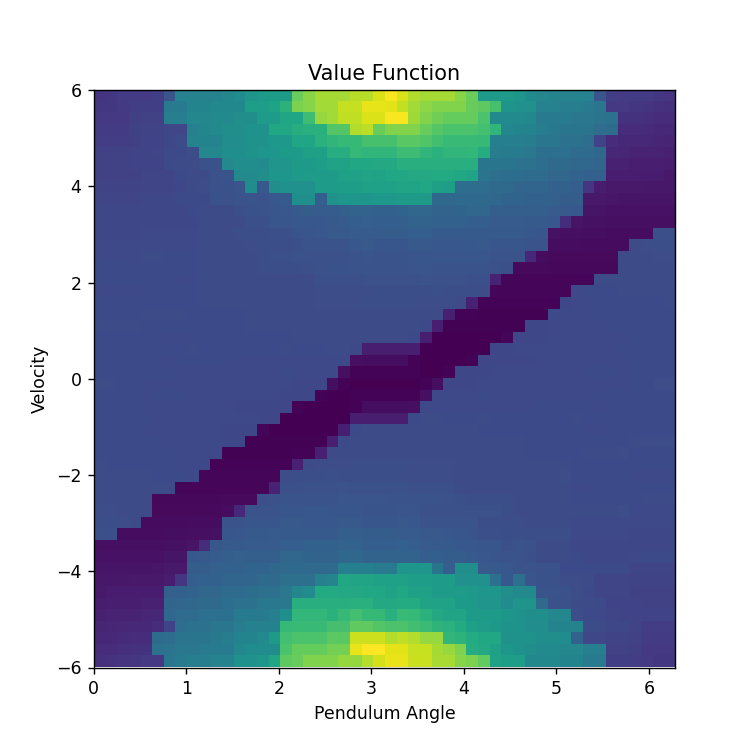

<IPython.core.display.Javascript object>


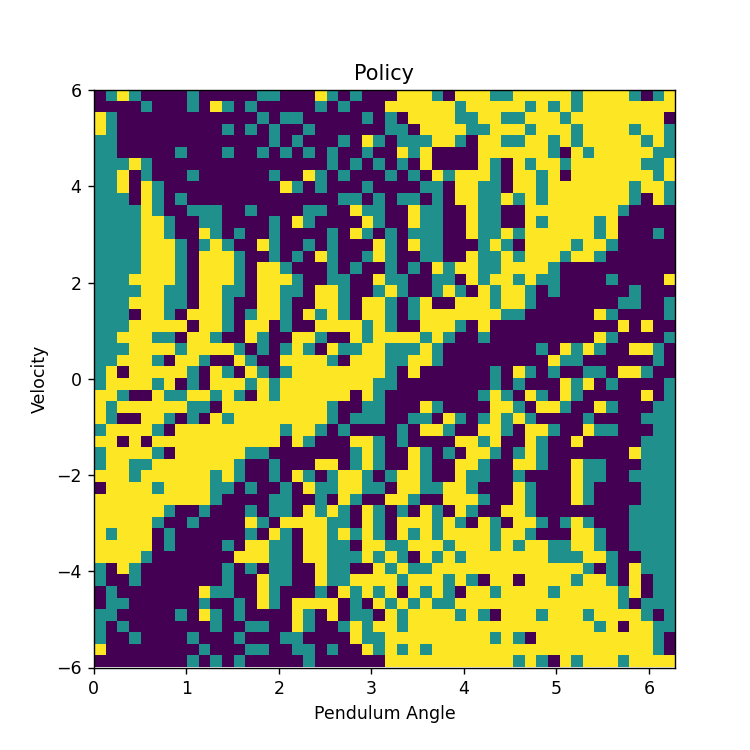

<IPython.core.display.Javascript object>


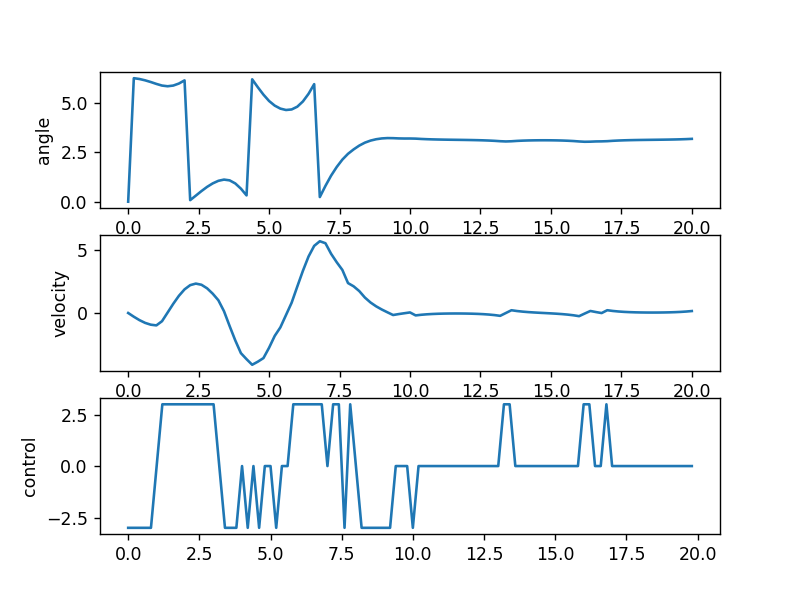

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAjEttZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhy
ZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA0xZYiEABD//veBvzLL
XyK6yXH5530srM885DxyXYmuuNAAAAMAAAMAAUeHteuN3YNbSdAAABrAA6Qix/9vpDjcAE/ZYPzW
Iy/xaAfWoiuIxPmK2D7zN1SWOL4zZ8ixj9mJWyafzaQPJPgumMKQ5V59n8tUzfUDS0tnaGINepwN
ygSCAo62Nj0Ixhv5SVoJFUYpmvY7OlceVopm0K7e9iLYzS+7C8RJRANe5oQnlmwO88l0TgfHNasA
cBupheGfaeEXLZmHWO+X2fTyHC+vtQ7TaNefQ7CHnR1luQXnqFHjCK9efiyP+qu6t8Lv5Q2TfbSJ
Uzs0SeYcbqwmukz92HSdD7mvf05DpwdQWbSEHWRNjTXhumQVil9qnvK4qtsUvcIMXzoSTSbemIa1
zJu841W2+V44G5B3MZ0BrlgHnYsCWKot35uLoxydIpjYWg9+7lBp1dLoRR8HR6ljB55JGWL+XQwN
sLum9zkPSkcJ+V/Ngl3Qa8E35Nz34JkIu35PUQAXNmP5a/sJO/zRhyFusW1qwkI1iN5DIJp2XQqA
bPb8kSwU6QlSI+2r/Ap+Q0l5RJ/0nftzawE1OQzWCRSL/fGQO94rq9bladJxrF8QRZSdR9vuHOb9
LHOidxh0CfkFn1zDDKZ6xn6mDvAAWWi6LbBQfyx5GxcLoqexfshUiZjj4579qehLAs2eJLYzPFtX
V2hBtrLktP6rM42xUGNNvgCK9lWqUHPtQRVqq3Nabte6IX088F59nygAudtZ5wAAAwEsMFHKmmOQ
JL6c6omG4FzLrFROVCN8Y3SWZfWBnhVC5ZxYKdUzuUti4r9eKJYkh5hIAX8r4CVBmPr4lxft7JTF
FDb4zeNw275cj37UJqLU8BJzS+KpO0D1md0phCkCGUmoZrKZNWoKXeMHxXKRUEPYLG7cMHsUeBrE
fvwjf6TIBPmo5X/Js9NUip6JQW3E4NQcYAyThbEq5Rarf85oOVb19ZXzh2rYaL6Mu3Xf72FKoy75
b2DUFhW11asL0gdfOw9cd6//LzUoKwb7fnrhp68i+oPIjy1vZVRxAkp560e6GK1nPaei8uCjS+2c
hzafSxn5kGbz1v/XuktqJrMVcT5kTQKbgxnsxlORaEH/U9XGC01STeixv2Nkjq6cJftx8Rothac1
XXKwOqyGx5ogmId0sZ+ZCJRZL+9/EI8tXmvrhiqyssB5Jz2foSX8oWU8sthZLUL2GSa9etyWRPBt
cblR6+jz9jz6cKmtlP9mrsiqS5A2gPUpsSIDWmHYSjiZJ1k1l3WDsK2F1UOvRbTXeW4HMId13ROZ
hIUhMMBEsz/aYKw4h//ftO5/mJjLY1dd/kNI8uUvFfQKYprAv7Jfub4WCcQbJJayH0jSybNlPCEl
MHt2xmySsE+B5nJW5OSUcABHt0vCVQ2S+sHXBbyFF9scNX3tk6MebHAuBgMUgjut7uUUcm+jUg6T
+p+KRHULhx5ljqrFuF8TxCuAOL/C8dxnmALOb7gsVb0ZCBfKqwYHLkvO5VcdKoZKinsOEKvyCL9S
tgRRi5OroT4z8KmkWe0geZtLK4PyHlU7upot+9vH1VkQ2qKgZ5ZwAqyKbcdl7wvzydJPQPsN7qHx
rmd1SbQZqvgRnoO+Y012P9Prg5yF+Tb1jOC7RSV3bH1m/cXCGnN0kdFWBNvThjQIS6f4NlHFgBFa
NJ6SxSQnYuD52UAi6RzkJVkTezwNrnDQ8GOU1TxfI8HwZc/m6Oldwi43WRDqIiqF11ALEKxfvP5i
7wob+ds50oq+ocfHih1LDeuuVIhAT7//mM/tGay3ydkJ/i8qmPKAsnmJ2vAqjfHF33gAcgphJt9W
Us16Tk6PgJQYlJLvRP4/Ru+MOdcDP/7I91tm3muAuqbt2xI+M8Dt5OCzkXdUJnUWklQbNW4uLmDd
DlcjlMd2Xs1bgoKnZJkyTMCIHA+Rc5dHkhhC2Fjb8wCCIlp6uQ+wvGRbXt23sWwNfqZZaG1JUaYa
l39w/YASnMIuQ3vTvmMVYPNBf2y/V0KDSiAiAai9NT8qAa9AK95JlRCM4fQ/vJ5k+Zbe2UhblJMq
RPuIz5W6TVJMW7ZJ5aksuDCP6I9no8n8BQf2tW7kthAUtMQFL6eEXF+LKq2m0EZL87CTY3AMPayT
Kt0mU41JRJUPG/lHJLr4OoYNxH2DL0ZxCjzizt2ElpFcKbYdPV9MSpO4tsYm44Yr14jj3Pcf7N1y
tQ+Gz/19MGXsdCIGP86bj79Ya9TM6GNr/6QDRzKmLK8WA3YEVVkEkMWYoALnlLwxzVSLIFuEF3FN
gBW2ye5cX6RI2/Re96SyJelLyom8E1YU3x8A3kkEpH+7or/xUzlyGQfvL7NgbBFCXdSjXNgawKpY
aGpijXzc2rZ0P70hl9R7bo8M8t/9437rFCofL/fseI8c2AAFWpdYC/3zMoWumhld8WnNxnU66sSa
fDU15vzL4RxZqAAoAtZfUAAAAwE5XyIt8wnYVM2pC8M8F9KlDygPHZroiRr6nnPAMWkCNWlQgwnK
96SdJ1O9mLChHSuavbjxUd1XRz5XBL7RN82DeDnEyTomNYdAV84f4ysB8ACbvavGPPhjuPBjqpaN
sXgfUPvOnnNZfOyyXnOr0V3LYwKPW+n1OkSixLOkCd/f3LJfTFiDbhSKHSDF9pb+yC1ahTx5fOJM
pTaiujtHbjmH6d2nmg1d1kMEn1qRYdFmdM9C7FXXNq19Kvj+HV/cnnuSECCT9mDqmO1jmIeI2++u
91TqA3vIpWOzuHjDswgokTyiXVhIqZMHyaIcN0f/RyRlxneSCzPM7cWkt3r/ZC/RZ2fzBM+qJqK2
4r1zCMrQG9TU5DNYJLl//UM4ThWzJQ4l/9RIUFIHBFg+0oU5QCHfWrp/O5Si7cxbo7kajK0nRV41
sgq409sNbZqHkmmobMOrB

In [8]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2


# we make a robot
robot = pendulum.Pendulum()

value_function = v
policy = p


# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')

# now we simulate the dynamics for 100 time steps
x0 = np.array([0.,0.])

def controller(x):
    theta = np.linspace(0, 2*np.pi, 50, endpoint=False)
    dtheta = np.linspace(-6, 6, 50)
    
    th_index = np.argmin(np.abs(theta - x[0]))
    dth_index = np.argmin(np.abs(dtheta - x[1]))
    return policy[th_index, dth_index]

x, u = robot.simulate(x0, controller, 10)

# and plot the results
time = np.linspace(0.,20., len(x[0,:]))
plt.figure()
plt.subplot(3,1,1)
plt.plot(time,x[0,:])
plt.ylabel('angle')
plt.subplot(3,1,2)
plt.plot(time,x[1,:])
plt.ylabel('velocity')
plt.subplot(3,1,3)
plt.plot(time[:-1],u)
plt.ylabel('control')

# and show an animation
robot.animate_robot(x, robot.delta_t)


control $u \in \{-5, 0 ,5\}$  
"sparse" cost function $g(x,u) = \left\{ \begin{array}{l} 0 \quad \textrm{if } |\theta - \pi| < 0.2 \\ 1 \quad \textrm{otherwise} \end{array} \right.$

In [9]:
controls = np.array([-5,0,5])
cost_function = cost_sparse
v,p = value_iteration(robot)

The number of iterations required for convergence :  27


<IPython.core.display.Javascript object>


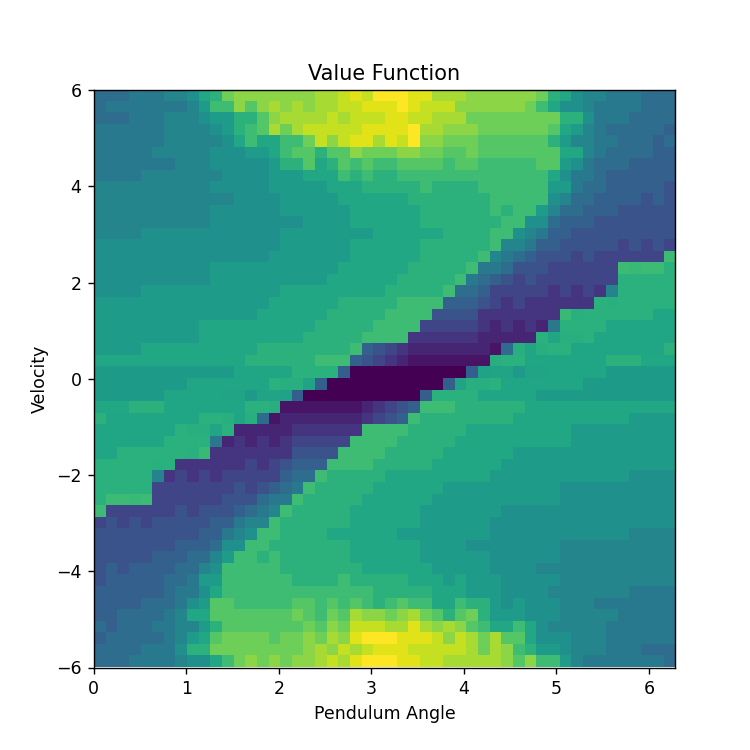

<IPython.core.display.Javascript object>


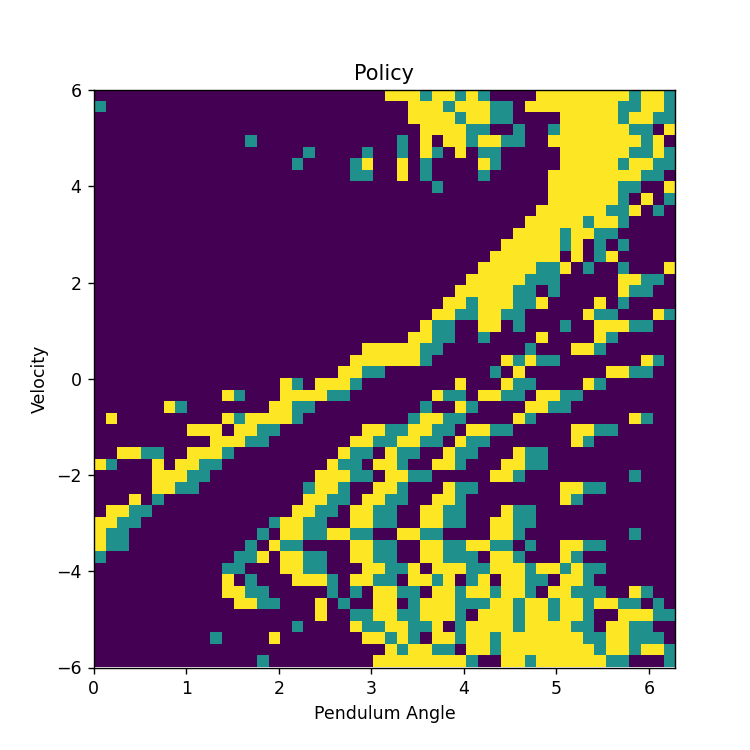

<IPython.core.display.Javascript object>


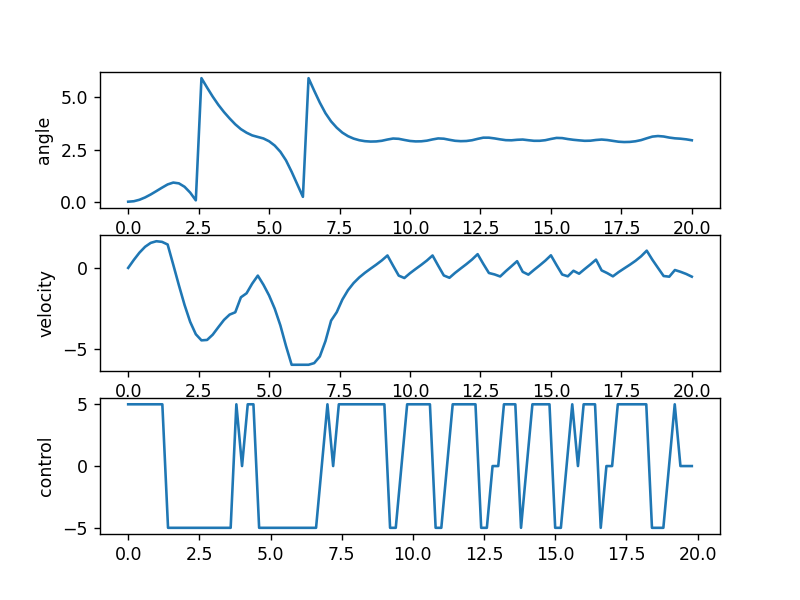

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAlyZtZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhy
ZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA0bZYiEABD//veBvzLL
XyK6yXH5530srM885DxyXYmuuNAAAAMAAAMAAUeHteuN3YNbSdAAABrAA6Qix/9vpDjcAE/ZYPzW
Iy/xaAfWoiuIxPmK2D7zN1SWOL4zZ8ixj9mJWyafzaQPJPgumMKQ5V59n8tUzfUDS0tnaGINepwN
ygSCAo62Nj0Ixhv5SVoJFUYpmvY7OlceVopm0K7e9iLYzS+7C8RJRANe5oQnlmwO88l0TgfHNasA
cBupheGfaeEXLZmHWO+X2fTyHC+vtQ7TaNefQ7CHnR1luQXnqFHjCK9efiyP+qu6t8Lv5Q2TfbSJ
Uzs0SeYcbqwmukz92HSdD7mvf05DpwdQWbSEHWRNjTXhumQVil9qnvK4qtsUvcIMXzoSTSbemIa1
zJu841W2+V44G5B3MZ0BrlgHnYsCWKot35uLoxydIpjYWg9+7lBp1dLoRR8HR6ljB55JGWL+XQwN
sLum9zkPSkcJ+V/Ngl3Qa8E35Nz34JkIu35PUQAXNmP5a/sJO/zRhyFusWY9dd84+dwmJGjR9bSR
hyEuD5oE+J/N1JPUHRdzTao0GXkZ5sELteNx3YXwFU+pqchmsEiLH5bVBYWfAHJbdbHUarPYCd/h
U9s+prV10KxzWeUndfl/LEAXXBhU3n/Uwd4ACyvb93TPL+qMpqqZlUZsl+yFSJmOPjnvBcYWCNBu
17wBYHcSqMksoASQxWbOYvweHbfqPn+DpmdYAC18tPBAc8UsoUJag8vXSzXEnMAAAAMAIOAI2QY5
tNyBJfULs5GP5f6I6Q4oouXxjdJYRnbEubDcoYvQ7RDJmgDFxX68USxJDzCTTj0gWQqDMbBBKC/b
2SmKKG3xm8JtZ3y5Hv2oTUUi4ZaabmVSdoHrM7pS/GJvuLAQfoDVsm7Mo8YPiuUioIewUcgDZzT1
NMS8tRLGI8q+cVJD5X/JsMrUip6JQW3E9uWJqAyThbEq5RbrJw5oOVb19ZXzhkCjPL/0BgokiYi8
WyaunIEQcKc5fnbRKAwHYP5iCvf6+YlBVnVakCzMTHjyoxkPeS25ha4aGn5RIdXAwjdX0tJPTy94
iFkXMCvT/ZLsZECbLm/TZ4oYsOsS4lGI3wW9zQtmBc7+r5x2os+giWCDl557R5Pkl1EeyLmaKfkw
pmtZIhEhy2romVFXKMiLAJSo3sD1//0gFhZZ1tOgKZIZ2C2RrSDAFgKdU4WO0eZ4wp573aCtPshd
TOyGZVi4f4E2fbNVb77RnJ3hLtPrIrZYyGIQl3BCTSn2vNmceTT9EEkc56cUhFIUaR5E4Hm/dHkF
NC3l2oYaGqN8BEsz/Zi63HEHm0/hg7Zuu7NEphKm+zzR3A0pwsOlnTP7Jfub4Wmx6JNzkZi0pfXv
J0OZgP+qa56ttLJ7DeWYV/Sk3JKfwGA7e2g8JPiNxrWagAxf63B41I7I9VFdDLEudqpdC0UGwDVm
uVoz3qs4pDq/k9FGWikO0fi1Bd7KL/C8bX2fVvrcRtVavPdYtuZfBvNr9JrazZZMdl/ciD3D+1Sy
VAIZtl20LgqG6M6nQVheGGUACmnHD44CgyToN/akRh4IoCJml6XSxlDfsmZe8HBxffZSbVYR50el
H665oUA1DsWRsDX7S680K978uoN/aNLDuduhUO90TVKRSA23h62XUZiQ39ZL5LZOdNcujNSaHgQ0
F5j41FlP2iko4fUBSYospp+sgJE/znklJtfraZweqSmnsaI6A4l+nyppewXNZscWMkbAaQvECRjH
g/vH/s+vZFnEsrVA9vqPOTHJ2OL9a9lTrIyREIVoJ46/JxNV3PZcAxrbV4nph1BwVYGssA6JdeSI
pUUwh/fXuEJtN5YzYdKDTBgYTho/+LmcU+9ci8k1l17DIWaOIY9jPCumAR4u7v84fHMB8He3/vh0
dGlOWAMpmjacqYsMhEU0SA4xlv/W5xozZaK8Iw2lNPQEcvVRn3Z067Cla/z+bA1+pmtCL1uOFMNU
Beyf9k5VcVauhJ45rEgvML21gsnlkW0EVYp/QAQg15oKKtvIuFCWi8T25cGFizYiMytqcqCKfYdU
Dr//MCDP5ZtmHDoM84yIH51rVWejyfwFB/ehT6VaBL2YmJGHp4RcX4sqrbNQRkvzsJNjcDvlrJMq
3SZTjUlElRAb+Uckuvg6hgn5XZl7qYyCrLQmvN+jkT9w62+KjzXiUJ4iDEdMsykN/ffaUhBTIAAZ
1zbs7/9nCL8g//22f1OGY7VXrqLLZJwOErL5Pis3igYzIv8PbPGiAGbmYMEo2jbtRIXe/p/10xDH
+32XDapQ7E7pG6pPLW7tJwsWA2cF9NtClGrHYvL5J5DBMxP8cUmIL1Lj8SIkKFFI+Gpwrc6IkkhF
gOtJQx/S6wuR0wj8wpWyLzzBdGQABY0YAPDB8GxZXPsD8K4cERyyDX7TqQCl+rfgA7sUHSPEGwti
n5rzRr/6M2zGAW2QHvA6/8wfnPYkuAaE3dSYCWWZk2dRkTbBFMoMZjaWFkopj1PHO/HCB0rIGZMA
5Yjxf2Y20hKtjUH4flDvq/1/vDrYzvIkxV+o27VPEac8T1sv0scJvqFC+R1MWIiwjrfUxzoAOr8t
d/W7GlZ7s5xPcaJueTEoGCSsfbhY2NH64kzV+I2EHGA81mxeuJ9rrhtehJFfTtaAwRkRJj0McqPf
R73e7N6rAbM6e2kfDIAQe2qS1q85p/R60KiB9pV3agV07lPWJLCliJ8WL7klxH2PflC/QqYV9lnk
3l7qnbSjTfq6EOL6mLHQVTJfTtjxuAoGy//DDubrhVBaD7yOzb5a5hmUFpv3CUSXu2+Qq268EBcy
oFfdso8lpSepyGY1nJn/+ftcbGRSnA+uYVYCdzOxyM45lTKO28V+C20vtL7wkazoe7VDYPMJ3a2v
HwEmwuK7E+dXi/EIHyKRD

In [10]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2


# we make a robot
robot = pendulum.Pendulum()

value_function = v
policy = p


# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')

# now we simulate the dynamics for 100 time steps
x0 = np.array([0.,0.])

def controller(x):
    theta = np.linspace(0, 2*np.pi, 50, endpoint=False)
    dtheta = np.linspace(-6, 6, 50)
    
    th_index = np.argmin(np.abs(theta - x[0]))
    dth_index = np.argmin(np.abs(dtheta - x[1]))
    return policy[th_index, dth_index]

x, u = robot.simulate(x0, controller, 10)

# and plot the results
time = np.linspace(0.,20., len(x[0,:]))
plt.figure()
plt.subplot(3,1,1)
plt.plot(time,x[0,:])
plt.ylabel('angle')
plt.subplot(3,1,2)
plt.plot(time,x[1,:])
plt.ylabel('velocity')
plt.subplot(3,1,3)
plt.plot(time[:-1],u)
plt.ylabel('control')

# and show an animation
robot.animate_robot(x, robot.delta_t)

## Tabular Q-learning

In [11]:
def q_learning(robot):
    x = x0
    
    # for 100 time steps
    for t in range(0,100):
        Q_t = Q_table.copy()
        #i,j are indices of current state xt
        i, j = index_state(x)
        
        # choosing action (might have to change)
        a = Q_t[0,i,j]
        Q_u = 0
        for u in range(len(controls)):
            if a > Q_t[u,i,j]:
                a = Q_t[u,i,j]
                Q_u = u     
        actions = [Q_u, random.choice(range(len(controls)))]
        distribution = [1-E, E]
        k = random.choices(actions, distribution)[0] # index of the action
        
        x_next = robot.next_state(x,controls[k])
        i_n, j_n = index_state(x_next)
        Q_table[k,i,j] = Q_t[k,i,j] + gamma * (cost(x[0],x[1],controls[k])+alpha*(min((Q_t[k,i_n,j_n]) for k in range(3))) - Q_t[k,i,j])
        x = x_next
        
    return Q_table

            


Optimal policy and Optimal value function from the Q-table

In [12]:
def vf_policy(Q_table):
    
    vf = np.zeros((50,50))
    policy = np.zeros((50,50))
    
    #print("policy before",policy)
   
    for i in range(len(discretized_theta)):
        for j in range(len(discretized_thetadot)):
            
            a = Q_table[0][i][j]
            Q_u = 0
            for n in range(len(controls)):
                if a > Q_table[n][i][j]:
                    a = Q_table[n][i][j]
                    Q_u = n 
            #print("Q_u",Q_u)
                    
            vf[i,j] = a
            policy[i,j] = controls[Q_u]
            
    return vf,policy
            

#### Inverting the pedulum using Tabular Q-learning 

In [13]:
# can be initialized out of the function
E = 0.1
gamma = 0.1
alpha = 0.99
controls = np.array([-5,0,5])
Q_table = np.zeros((3,50,50))
iterations = 5000

# initial state for the episode
x0 = np.array([0.,0.])
for n in range(iterations):
    Q_table = q_learning(robot)
    
vf,p = vf_policy(Q_table)

<IPython.core.display.Javascript object>


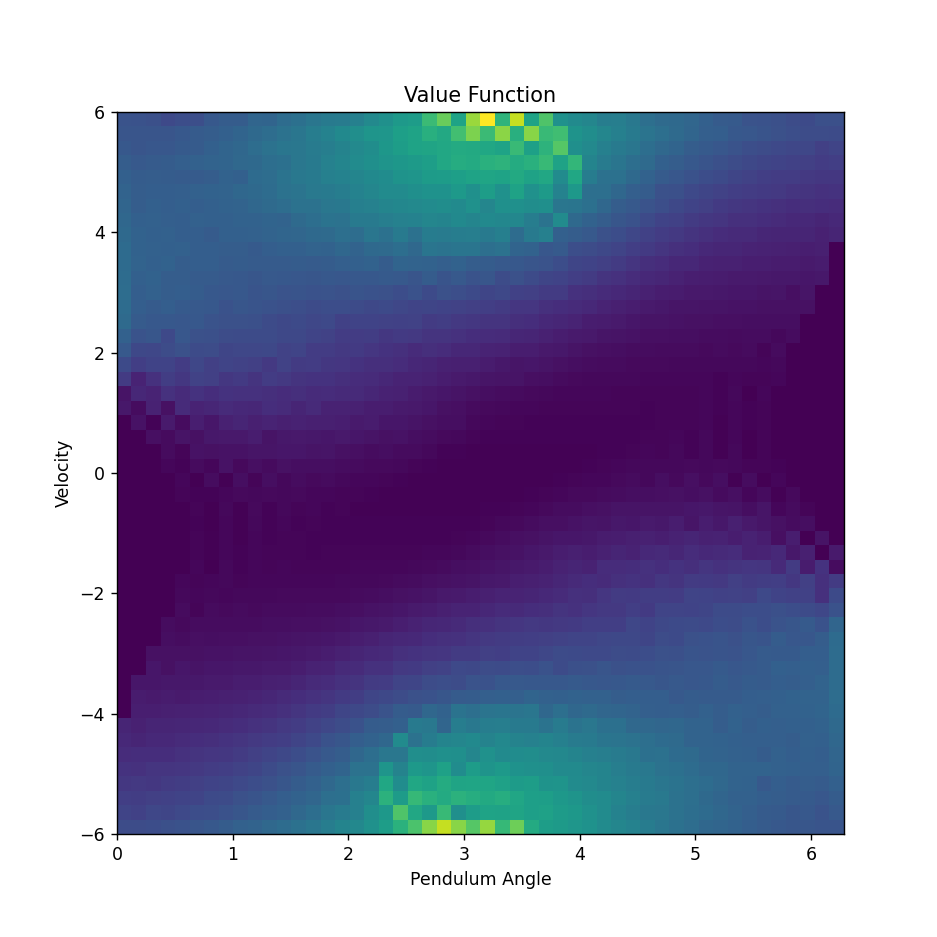

<IPython.core.display.Javascript object>


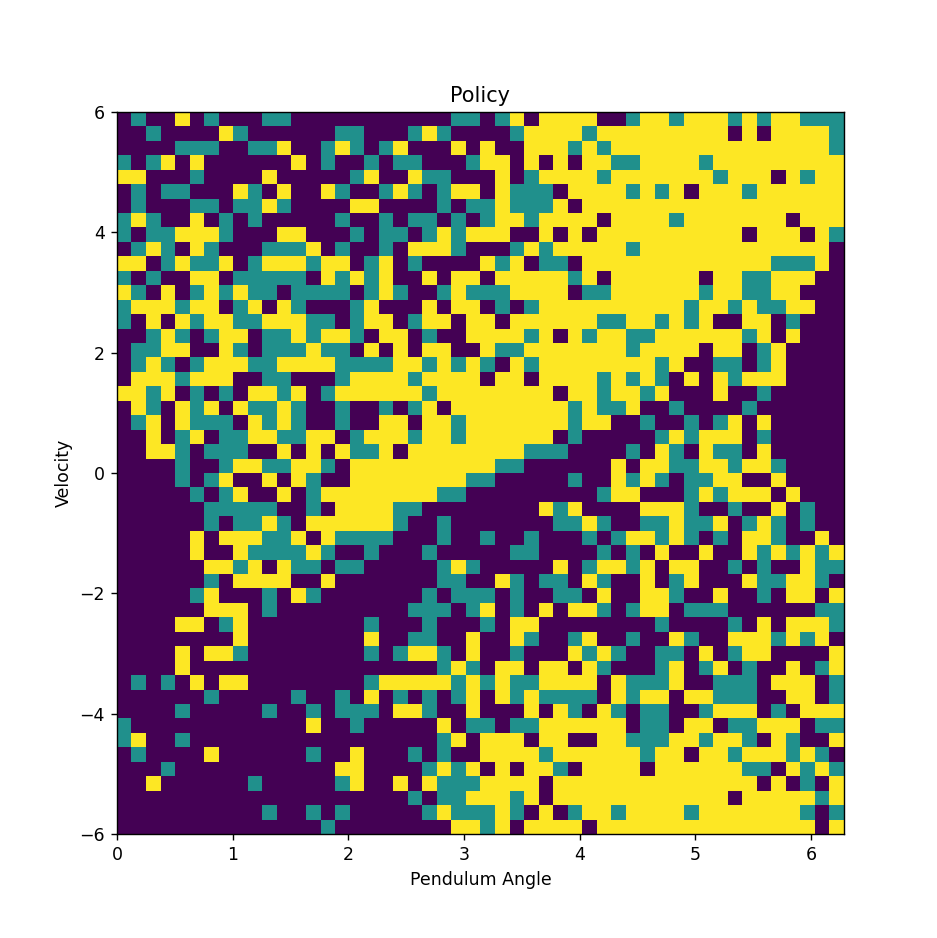

<IPython.core.display.Javascript object>


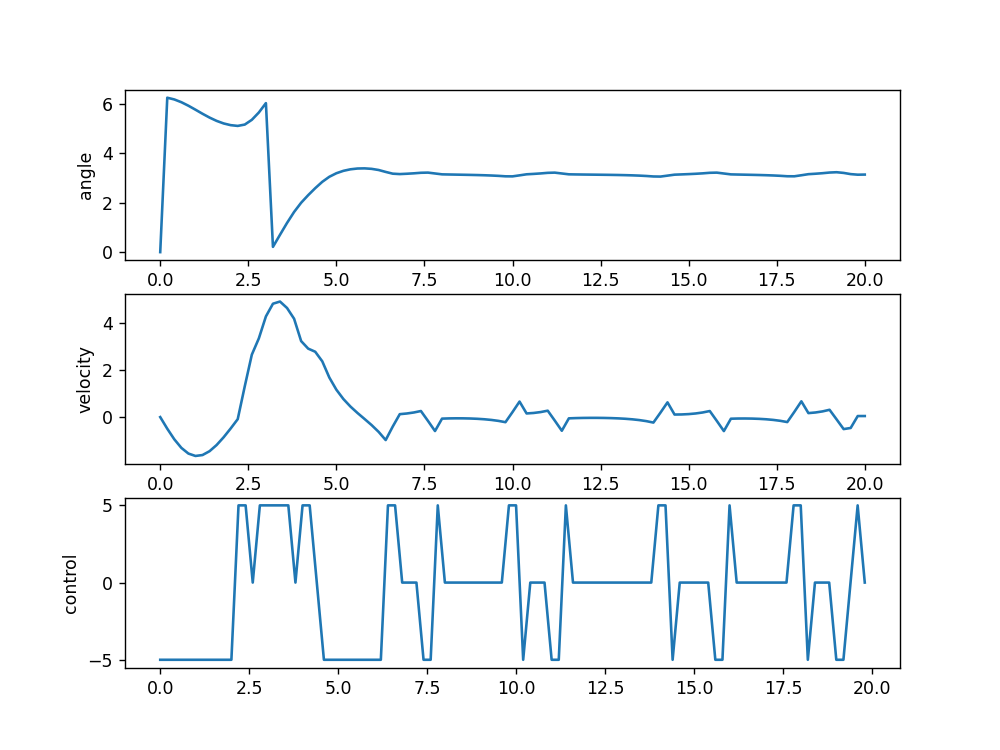

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAgmptZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhy
ZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA0UZYiEAD///vdonwKb
WkN6gOSVxSXbT4H/q2dwfI/pAwAAAwAAAwAAFbekZYZCdC/yYgAABXwAsgZkmelxSROADzDHsnTd
NPwqh0IYXPcgsx/VdOgPtpJk3xmz25oQD2NxIJATjjPFHtCPYSSyrz7P5apm+qGoCaO0hQa9Tgbl
AkEBRtsbJoJjDfyhjQSKoxTNex2bKxAqRTNoM297EWxml92F4SgqAa9lbwbZ8+3M8l0TfdHNaygc
Buoe/stRvUXLZinWJDX2fTyHC+vsg7SSDh9VCALo/f8LntmbRMOk0qgXCi/HjrLAaDHF+z18yVLK
2z74iGw43VhNdJn7sOk6H3E21bAuxha9GcFT2B/gDsnAFBY5gBiZPeVxVbYpe4QYu/Qkmk29MQ1r
mTd5w6tt8rxwNyDWYzoDXLAPOxYEu0cWoQcXPjpp4iBWBfo93KDgq6XQij4Oj1LGDzySMr38uhgb
YXdV91VBopGTufKSekk2ZkKOtbq4Kr/zM9vviogAubMfy1/YSD/ic+Z6ysW11mqEaw28fkE07LoV
ANnt98/WFOh2kP4qKS2EOW2R/aA3Z7G+ebWAmpyGawSKOP74xuxvFb5q1HlG8DH3O6BFg3INvuHO
b9LHOidxhtyJ3CtFzNDKZ6xn6mDvAAWWi6X5dO/wM3+9oH84RnZyXvVBZTxz37Y9CWBZs8SWxmeL
auVtCDCWXGmfqsrX44vYzKgrd2wwG3rPvOPv7iFy1j/7fjvMoq0LOfQ3gAAABRgAIcRUyVDtJ8vp
PKrw7p+ef6Q4oouXxjdJSGc/pc2G5Qxeh2iGTCz9hEFwsyTEkPMJMjPSBZCoMxrnHu4JWLWOOlzq
EVbv0Se/YiSZJCjuswSc0viqTtA9ZndKYTJAhlJqGaymTVqRnunUKx0kFvvet62WGMAX7Kvd/34s
xm9sAnzUcr/k3InPRU9EoLbie3zk1AZJwtiVcoyYv+c0HKt6+sr5wvNRnl82bb0397ClUZd8t7Bo
Cwra6tWF6QOvnYeuPlf/l6sUFYd+BF3oKcvLQpExJ5ltZc/BUSU89aPdDFa0XtcReXBRpfsAmd55
3GL50WxBwHr/9BaJ2mYSsWifMioMfb8TZ7G3BfgyuGHBLaXMiNPEl0ueyeapxgV5uFKf7PY/uaXF
eG1mcuOSR9enkaaL069CfP+5Su7fhd3LTdgVWOM3EhqUmv1W0QuPmQjJQFoa8Lraig4DbY0Eg65z
T/qLMr9T8I2ps8ycUQw8wzIDFrcVWeHIul6xR8Qm9IDA3t7zX76NCwrYXVQkxDSv6qI1HqG8pCwU
UtyiFlYK+qBNrHs/LBAjP2WRJE8Guf2m774NC7/pag7xE0gVBzcyWS5MvAHPwUdyrpM8vpa5o8mA
rK5/4We4j/X+uw1VNiYah/NPymKbTm86BjL21K1C2Jg5XU/Z0gjKB19JX6BrZCsP9yhPP97xdiMM
f3vxURtBvw1xILnuQIeO20JPHoNHC/mnOhKnweqxhj9PwsudvbTOzo4ae6yO0U5Jqrgcie5RliF8
+4Ey1eVmbwd3ox+z8Op1ZiElHjYImRyNahjXpxJPajeXEQBeUU1Z1SCbFMVdEPhLwO1RVTuqOcNF
urh4EeYW5VNss9MqlMVM4NqJ8p0zjojhOPa87/LOpYglf7kV3YB5ecE7k7fLC7WUbUzchg6rOfDA
F6Iqt8wxSANLPs2nq2td2RFEH2CE1qaU5556zGn4HW0qiRh+wLpPjohACHfLMP2iX8bK43R0eKPI
cY+Bh6OUGcPgQ/DHurSCwQ4JXCWId5ui1yQs5vF5dNVWQPGNatSkQZ6+yF0CZc9a5xx8Bp9z7Je0
E0IuOARB3A+ZbtWS1T+2v3ehhKlrUyFsqq9/sYDMfMoDG+ZSXPQu8Y5Z/46ScreRbp9tNqCu9VK7
PVxhBcunDCsvCDLcHv3Pg5WJDCFsLbgHXzyrQ+mMC8t6th2vbtvYtga/UzV1DakqNMNRT17DtQ9O
YRp7UtgzWJBeYXtrZbpcQXoIqxT+gAhWhdCiaeORcKEtF4pKV2/bFmxEZlbU6xE8rJzUDr//MCDP
jbWIjORBdbuVX0hoj2ejyfwFB/eR5QlsIClnEvGrsYi4vxZVW4KEEEXrYSbG4Qom6rXY9JlONSUS
VTpv5RyS6+DqGCiaKFuupjIKstCa75yG4MEXfG2+qYEBOhRhLBbuCVIdQbsP4+I9ftVnVB4XN//N
sFSJZpRE10w6ZXUWVyur8mEzczjgBJRIlrlSPhu/YW9z+6kdxnjoJWOIPxI+//0/nKAFkNY/ERCk
hIE656ndIG9z+wQ4oaE1L+YiCUA5WwWFNhyCKF7O+6lR94gkBW2dwoUHe6itveU248RzA+3OtfN4
YC2pcHb4FJeikE+OwDwBKR0Ev8gmfMAAA8d20YJo0QPFAd8UhYjA4ATMAAa5/fFLYrWR+xAAAS7G
5uugz3kPgAiKIPbGo5YfS1TZ7TZVB8wy2JehnwOjyf3nKDpAIXlhphaNkW06XMarDeEwPNlWfifM
w3rydddmydlnRoFfcnTwGpF7NmT2L6/Jufg+GCuWW+Hy4a1ItxbQy/xi+AEHMslBAHaqABMr+zUd
C5jhrw4SrBikTKiqoUOmh4zsi/Nfw5vuOIPKmG4U7aesnngYILty9B6XgfFWdtQAWLnQkT9Vfe9o
yh7u6VEXnHFZXjhH2KHtYZI4ZB20y5EXOjasNmUPbYFx57khAgkmYMmIrhfYOq0RzjqsONl+fTNY
KHIS4eMOysjfPlBzwmEipkwfJohw8h/5kUkijTI/EtZvQdRkFSI+tV/l3VK0xB+IG2xQOegP/FVt
qn+iDRACjk/8aVkoLcRa5UwsQXFw85eEcimE/vtHz+qFOiZj0PldypR734BwYr6QsEpzlz43J9Tn
BzHi2X1gaswl6owexDzjZ

In [14]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2


# we make a robot
robot = pendulum.Pendulum()

value_function = vf
policy = p


# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')

# now we simulate the dynamics for 100 time steps
x0 = np.array([0.,0.])

def controller(x):
    theta = np.linspace(0, 2*np.pi, 50, endpoint=False)
    dtheta = np.linspace(-6, 6, 50)
    
    th_index = np.argmin(np.abs(theta - x[0]))
    dth_index = np.argmin(np.abs(dtheta - x[1]))
    return policy[th_index, dth_index]

x, u = robot.simulate(x0, controller, 10)

# and plot the results
time = np.linspace(0.,20., len(x[0,:]))
plt.figure()
plt.subplot(3,1,1)
plt.plot(time,x[0,:])
plt.ylabel('angle')
plt.subplot(3,1,2)
plt.plot(time,x[1,:])
plt.ylabel('velocity')
plt.subplot(3,1,3)
plt.plot(time[:-1],u)
plt.ylabel('control')

# and show an animation
robot.animate_robot(x, robot.delta_t)